In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 나눔 폰트 경로 지정 (Colab 기준)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 그래프 기본 설정
sns.set()
plt.rcParams['axes.unicode_minus'] = False

# fontproperties=font_prop

In [ ]:
# ✅ 1. 나눔 폰트 설치
!apt-get -qq -y install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import os
os.listdir('/usr/share/fonts/truetype/nanum/')

['NanumBarunGothic.ttf',
 '.uuid',
 'NanumSquareR.ttf',
 'NanumGothicCodingBold.ttf',
 'NanumSquareRoundR.ttf',
 'NanumMyeongjo.ttf',
 'NanumGothicCoding.ttf',
 'NanumGothicBold.ttf',
 'NanumBarunGothicBold.ttf',
 'NanumSquareRoundB.ttf',
 'NanumGothic.ttf',
 'NanumMyeongjoBold.ttf',
 'NanumSquareB.ttf']

# EDA

In [ ]:
# 전체 결측치 확인
print("전체 결측치 개수:")
print(df.isnull().sum())

# 완전히 빈 행 (NaN 또는 공백 포함)을 찾기
# (공백 문자열도 NaN으로 간주하려면 replace 처리)
df_cleaned = df.replace(r'^\s*$', pd.NA, regex=True)  # 공백 문자열 → NA 처리

print("\n완전히 빈 행:")
print(df_cleaned[df_cleaned.isnull().all(axis=1)])

# 공백(빈 문자열) 포함된 셀 개수 확인
print("\n빈 문자열(공백) 개수:")
print((df == '').sum())

전체 결측치 개수:
event_time            0
event_type            0
product_id            0
category_id           0
brand           8757117
price                 0
user_id               0
user_session       4598
dtype: int64

완전히 빈 행:
Empty DataFrame
Columns: [event_time, event_type, product_id, category_id, brand, price, user_id, user_session]
Index: []

빈 문자열(공백) 개수:
event_time      0
event_type      0
product_id      0
category_id     0
brand           0
price           0
user_id         0
user_session    0
dtype: int64


In [ ]:
df['event_type'].value_counts()

,count
event_type,
view,9657821
cart,5768333
remove_from_cart,3979679
purchase,1287007


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12_데이터톤/eCommerce Events History in Cosmetics Shop/file/merged_data_결측치제거_시간변환_userkey추가.csv')
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_time_moscow,event_month,user_key
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:00+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:03+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:07+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:07+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:15+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...
20688106,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-03-01 02:59:32+03:00,NaN,622082947fb29909b-6ef5-4662-b4ee-288e73e5dc10
20688107,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-03-01 02:59:39+03:00,NaN,45970561105d2add3-01f7-47ee-8364-27341673227f
20688108,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-03-01 02:59:45+03:00,NaN,622090043ab7d349f-db5d-4790-8ab1-31e5c894459d
20688109,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-03-01 02:59:54+03:00,NaN,61984124218af673b-7fb9-4202-a66d-5c855bc0fd2d


In [ ]:
# event_month에 결측치가 있는 행 제거
df = df[~df['event_month'].isnull()]
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_time_moscow,event_month,user_key
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:00+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:03+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:07+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:07+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:15+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...
20676173,2020-02-29 20:59:58+00:00,remove_from_cart,5710530,1487580009622143014,irisk,0.63,622026701,54926d92-0446-4577-b923-a7309a5a8a52,2020-02-29 23:59:58+03:00,2.0,62202670154926d92-0446-4577-b923-a7309a5a8a52
20676174,2020-02-29 20:59:59+00:00,cart,5700037,1487580009286598681,runail,0.40,495882061,2ad87792-8da8-45e1-94ba-74cb133df9ab,2020-02-29 23:59:59+03:00,2.0,4958820612ad87792-8da8-45e1-94ba-74cb133df9ab
20676175,2020-02-29 20:59:59+00:00,remove_from_cart,5700037,1487580009286598681,runail,0.40,495882061,2ad87792-8da8-45e1-94ba-74cb133df9ab,2020-02-29 23:59:59+03:00,2.0,4958820612ad87792-8da8-45e1-94ba-74cb133df9ab
20676176,2020-02-29 20:59:59+00:00,view,5626878,1487580010125459512,NaN,0.95,549454509,9d66672a-54f8-42aa-ae75-47e749d49b93,2020-02-29 23:59:59+03:00,2.0,5494545099d66672a-54f8-42aa-ae75-47e749d49b93


# < brand 컬럼 >

### 결측치 & 고유값

In [ ]:
# 결측치(NaN) 개수
missing_count = df['brand'].isnull().sum()
print(f" 'brand' 컬럼의 결측치 개수: {missing_count}")

 'brand' 컬럼의 결측치 개수: 8750428


In [ ]:
# 고유 브랜드 수
unique_brand_count = df['brand'].nunique()
print(f"브랜드 고유값 개수: {unique_brand_count}")

# 브랜드별 등장 빈도 상위 20개
top20_brands = df['brand'].value_counts().head(20)
print("\n브랜드별 등장 빈도 (상위 20개):")
print(top20_brands)

브랜드 고유값 개수: 273

브랜드별 등장 빈도 (상위 20개):
brand
runail       1527794
irisk        1033009
masura        861260
grattol       851872
bpw.style     434595
ingarden      430705
estel         360624
kapous        324175
jessnail      252877
uno           250160
freedecor     236794
italwax       225425
concept       201143
bluesky       201035
pole          198416
haruyama      192076
cnd           177564
milv          166875
domix         158250
lianail       133336
Name: count, dtype: int64


### 브랜드별 주문 비율

In [ ]:
# 1. 주문(purchase)만 필터링
purchase_df = df[df['event_type'] == 'purchase']

# 2. 브랜드별 주문 수 집계 (내림차순)
brand_purchase_counts = purchase_df['brand'].value_counts()

# 3. 상위 20개 브랜드 선정 (주문 수 기준)
top20_brands = brand_purchase_counts.head(20).index

# 4. 상위 20개 브랜드 주문 비율 계산 (비율도 순서 동일하게)
brand_purchase_ratio = (brand_purchase_counts / brand_purchase_counts.sum() * 100).loc[top20_brands]

# 5. 상위 20개 브랜드 주문 데이터만 필터링
purchase_top20 = purchase_df[purchase_df['brand'].isin(top20_brands)]

# 6. 브랜드별 평균 가격 계산
brand_mean_price = purchase_top20.groupby('brand')['price'].mean().loc[top20_brands]

print(f"주문(purchase) 비율 기준 상위 20개 브랜드:\n")

# 7. 결과 출력 (주문 비율과 평균 가격 같이 보기)
result_df = pd.DataFrame({
    '주문비율(%)': brand_purchase_ratio.round(2),
    '평균주문가격': brand_mean_price.round(2)
})

print(result_df)

주문(purchase) 비율 기준 상위 20개 브랜드:

           주문비율(%)  평균주문가격
brand                     
runail       15.11    3.08
irisk        10.01    3.03
masura        6.74    2.81
grattol       6.72    5.38
bpw.style     5.15    1.18
ingarden      3.72    4.55
estel         2.64    6.27
uno           2.39   10.85
freedecor     2.37    1.30
italwax       2.32    6.08
kapous        2.22    3.85
domix         1.76    3.85
milv          1.72    1.77
haruyama      1.57    3.91
pole          1.57    3.58
bluesky       1.56    4.19
jessnail      1.31   13.95
concept       1.29    5.63
severina      1.24    2.86
zinger        1.22    4.21


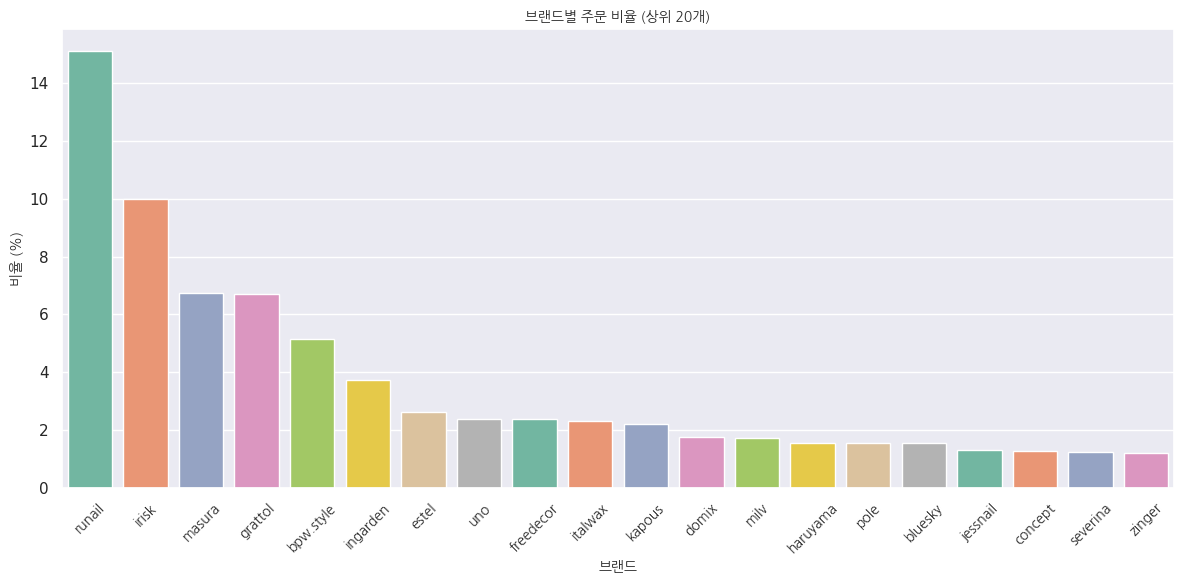

In [ ]:
plt.figure(figsize=(12, 6))

# x축: 브랜드명, y축: 주문비율 (result_df 기준)
sns.barplot(
    x=result_df.index,
    y=result_df['주문비율(%)'],
    palette='Set2'
)

plt.title('브랜드별 주문 비율 (상위 20개)', fontproperties=font_prop)
plt.xlabel('브랜드', fontproperties=font_prop)
plt.ylabel('비율 (%)', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

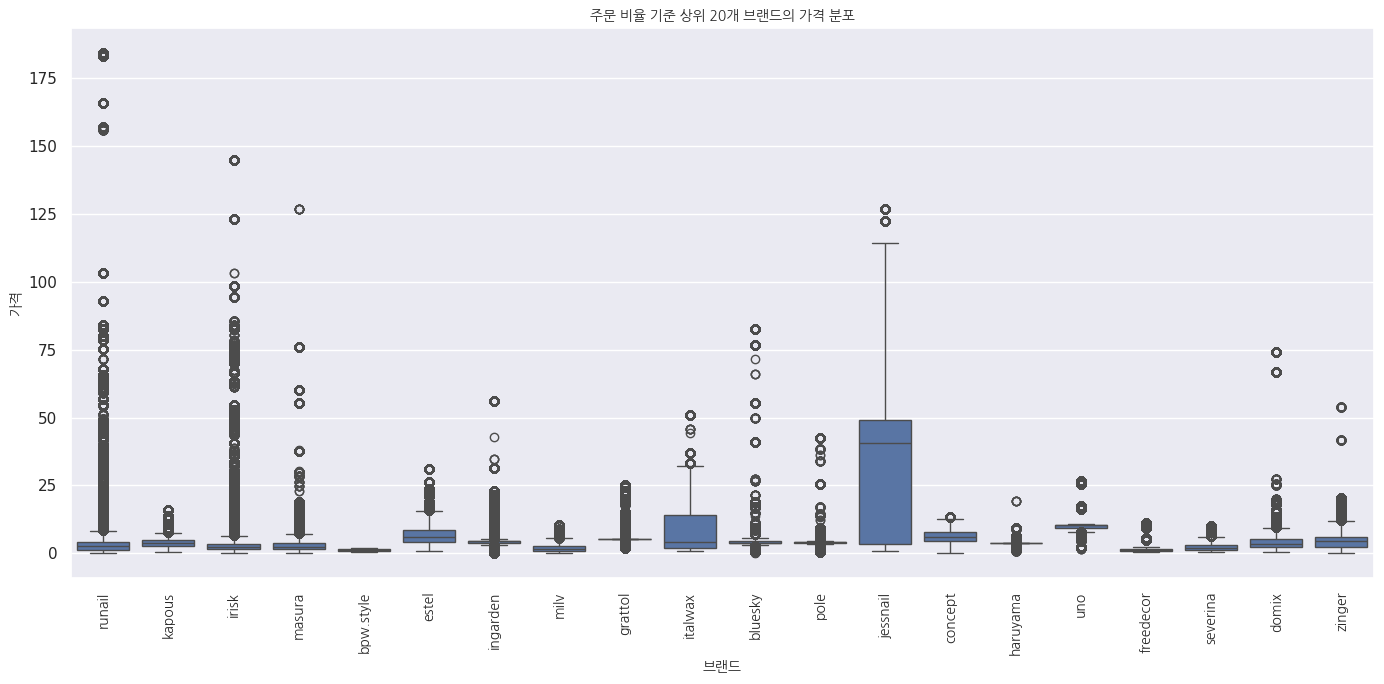

In [ ]:
# 6. 원본 데이터에서 상위 20개 브랜드 필터링
df_top20 = df[df['brand'].isin(top20_brands)]

# 7. 가격 분포 시각화
plt.figure(figsize=(14, 7))
sns.boxplot(x='brand', y='price', data=df_top20)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.title('주문 비율 기준 상위 20개 브랜드의 가격 분포', fontproperties=font_prop)
plt.xlabel('브랜드', fontproperties=font_prop)
plt.ylabel('가격', fontproperties=font_prop)
plt.tight_layout()
plt.show()

*   전체 주문 중 상위 20개 브랜드가 대부분을 차지하는 것으로 보임 → 특정 브랜드 집중도가 높음

*   전반적으로 주문비율이 높은 브랜드는 중저가대에 많음 (runail, irisk, masura 등)

*   일부 고가 브랜드는 주문비율이 낮음 → 가격이 주문량에 영향을 미치는 요인 중 하나로 추정 가능

### 브랜드별 가격 요약 통계

전체 주문 평균 가격

In [ ]:
# 주문(purchase) 데이터만 필터링
purchase_df = df[df['event_type'] == 'purchase']

# 전체 주문 평균 가격 계산
overall_mean_price = purchase_df['price'].mean()

print(f"전체 주문의 평균 가격: {overall_mean_price:.2f}")

전체 주문의 평균 가격: 4.94


In [ ]:
df.groupby('brand')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
airnails,82170.0,11.364919,29.335287,0.19,1.35,1.59,2.8600,107.94
almea,4988.0,28.128581,17.970775,3.33,15.71,31.43,39.5200,79.21
andrea,501.0,5.522335,0.317569,3.87,5.54,5.54,5.5400,6.08
ardell,46947.0,6.448871,1.022323,2.92,6.37,6.37,6.3700,17.38
arganoil,306.0,15.445654,7.287075,6.73,8.41,10.67,23.1600,26.21
...,...,...,...,...,...,...,...,...
ypsed,2486.0,23.247397,9.713455,5.08,19.16,21.79,21.7900,54.22
yu-r,2392.0,33.834448,5.811836,5.08,33.33,33.33,39.6800,39.68
zab,140.0,16.422143,1.757711,12.83,16.03,16.03,16.5025,19.27


price 데이터 수 상위 20개 컬럼

In [ ]:
# 1. 브랜드별 price 통계 요약
brand_price_stats = df.groupby('brand')['price'].describe()

# 2. count 기준으로 상위 20개 브랜드 선택
top20_by_count = brand_price_stats.sort_values(by='count', ascending=False).head(20)

# 3. 출력
print(top20_by_count.round(2))

               count   mean    std   min    25%    50%    75%     max
brand                                                                
runail     1527794.0   6.13  14.24  0.00   1.27   2.62   4.13  184.13
irisk      1033009.0   6.51  15.73  0.14   1.43   2.48   3.49  144.76
masura      861260.0   3.39   4.67  0.00   1.73   2.37   3.95  126.97
grattol     851872.0   5.47   1.72  1.90   5.24   5.24   5.24   25.24
bpw.style   434595.0   1.18   0.37  0.59   0.79   1.27   1.59    1.90
ingarden    430705.0   5.05   3.90  0.00   4.00   4.44   4.60   56.02
estel       360624.0   7.02   4.54  0.83   4.06   6.11   8.73   30.95
kapous      324175.0   3.89   1.62  0.68   2.81   3.65   4.75   15.86
jessnail    252877.0  40.26  35.59  0.84   3.49  40.48  49.21  126.83
uno         250160.0  10.17   3.76  1.43   9.37  10.32  10.32   26.83
freedecor   236794.0   1.51   1.33  0.67   0.79   1.29   1.43   11.11
italwax     225425.0   8.57   7.94  0.87   2.06   4.21  14.27   50.79
concept     201143.0

---

runail, irisk, masura, grattol 등은 전체 이벤트에서 가장 많이 등장한 브랜드
- runail : 약 152만 건으로 최다.
- 이들은 마케팅, 리스팅, 사용자 관심도 등에서 많이 노출된다고 추정 가능.

---

브랜드 간 평균 가격의 편차가 매우 큼.

- 예 : jessnail: 40.26, cnd: 17.16, uno: 10.17 등 고가 브랜드.
- 반면 bpw.style: 1.18, milv: 1.85 등은 저가형 제품군으로 해석됨.

---

가격대별 브랜드 포지셔닝 가능:
- 고가 브랜드: jessnail, cnd, uno, italwax
- 중가 브랜드: estel, runail, irisk, concept
- 저가 브랜드: bpw.style, milv, freedecor

---

가격 변동 폭(표준편차)이 높은 브랜드 :
- jessnail (35.59), cnd (22.48), runail (14.24) → 다양한 가격대의 상품 구성.

가격 변동이 거의 없는 브랜드:
- haruyama (std = 0.51), grattol (1.72) → 단일 제품군 중심일 가능성.

---

가격 이상치 및 최대값 분석 (max)
- cnd: 최대 291.90 → 프리미엄 제품 보유
- runail, jessnail, italwax 등은 최고가 제품군 포함
- bpw.style, milv, freedecor 등은 전체적으로 가격대가 낮고 max도 작음

---

브랜드별 가격 사분위수로 본 가격 분포
- grattol: 25%, 50%, 75% 모두 5.24 → 매우 일관된 가격대 제품 → 정형화된 제품군
- uno: 9.37 ~ 10.32 사이에 집중 → 중상가 제품
- bpw.style: 전체가 0.79 ~ 1.59 사이 → 균일한 초저가형

---

브랜드별 평균 가격

브랜드별 평균 가격 (상위 20개) 및 주문 비율:
strong               평균 가격: 197.36  주문 비율: 0.12%
sanoto               평균 가격: 135.86  주문 비율: 0.00%
marathon             평균 가격: 132.44  주문 비율: 0.05%
dorena               평균 가격: 113.72  주문 비율: 0.00%
s.care               평균 가격: 101.07  주문 비율: 0.00%
kosmekka             평균 가격: 83.04  주문 비율: 0.02%
sun                  평균 가격: 77.57  주문 비율: 0.00%
babyliss             평균 가격: 72.98  주문 비율: 0.01%
max                  평균 가격: 69.21  주문 비율: 0.12%
kondor               평균 가격: 61.22  주문 비율: 0.00%
polarus              평균 가격: 60.19  주문 비율: 0.12%
blise                평균 가격: 59.34  주문 비율: 0.00%
vosev                평균 가격: 57.93  주문 비율: 0.01%
coifin               평균 가격: 57.78  주문 비율: 0.02%
neoleor              평균 가격: 56.77  주문 비율: 0.00%
emil                 평균 가격: 52.75  주문 비율: 0.10%
gezatone             평균 가격: 51.21  주문 비율: 0.01%
sunuv                평균 가격: 49.60  주문 비율: 0.07%
jas                  평균 가격: 47.42  주문 비율: 0.12%
jaguar               평균 가격: 47.27  주문 비율: 0.04%


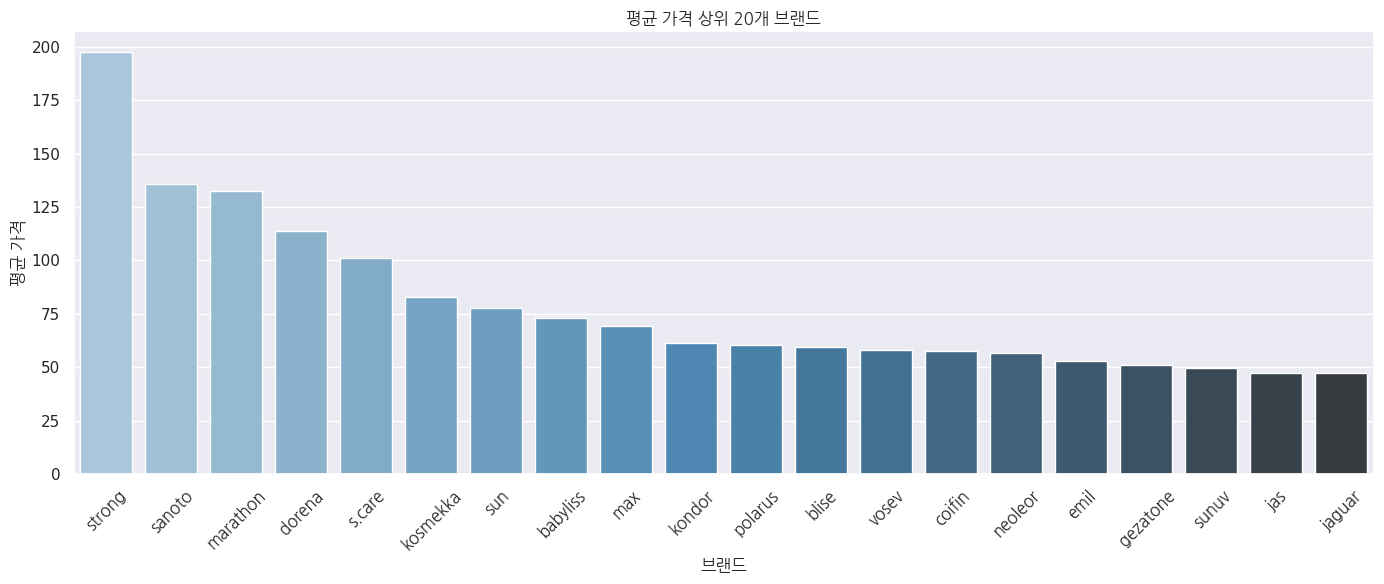

In [ ]:
# 1. 주문(purchase)만 필터링
purchase_df = df[df['event_type'] == 'purchase']

# 2. 브랜드별 주문 수 집계
brand_purchase_counts = purchase_df['brand'].value_counts()
total_purchase = brand_purchase_counts.sum()

# 3. 브랜드별 평균 가격 데이터가 담긴 DataFrame 가정 (예: brand_price_stats)
#    columns=['mean'] 형태여야 함

# 4. 평균 가격 기준 상위 20개 브랜드 추출
top20_mean = brand_price_stats.sort_values(by='mean', ascending=False).head(20)

# 5. 주문 비율 계산 (reindex 사용하여 없는 브랜드는 0으로 처리)
order_ratio = (brand_purchase_counts.reindex(top20_mean.index, fill_value=0) / total_purchase * 100).round(2)

# 6. top20_mean에 주문비율 컬럼 추가
top20_mean['주문비율(%)'] = order_ratio

# 7. 결과 출력
print("브랜드별 평균 가격 (상위 20개) 및 주문 비율:")
for brand, row in top20_mean.iterrows():
    print(f"{brand:<20} 평균 가격: {row['mean']:.2f}  주문 비율: {row['주문비율(%)']:.2f}%")

# 8. 시각화 - 평균 가격(막대그래프)과 주문 비율(라인그래프, 우측 y축)
plt.figure(figsize=(14, 6))
sns.barplot(x=top20_mean.index, y=top20_mean['mean'], palette='Blues_d')

plt.title('평균 가격 상위 20개 브랜드', fontproperties=font_prop)
plt.xlabel('브랜드', fontproperties=font_prop)
plt.ylabel('평균 가격', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

*   높은 평균 가격 대비 주문 비율이 매우 낮음을 확인할 수 있음 (대부분 0%~0.12%)

*   strong, max, polarus, emil, jas 등 일부 브랜드만 0.1% 내외로 주문 비율이 상대적으로 높음

*   고가 제품의 시장 점유율은 낮으나, 틈새 시장을 형성하고 있을 가능성

*   가격 민감도가 높은 소비자층에서는 상대적으로 선택을 덜 받고 있는 것으로 보임

In [ ]:
# 2. 브랜드별 데이터 개수 기준 상위 20개 브랜드 추출
top20_brands = df['brand'].value_counts().nlargest(20).index

# 3. 상위 20개 브랜드에 해당하는 데이터만 필터링
df_top20 = df[df['brand'].isin(top20_brands)]

# 4. 가격 구간 정의
max_price = df_top20['price'].max()
price_bins = [0, 50, 100, 150, 200, 250, 300]

# 만약 최대 가격이 300보다 작으면 마지막 구간 수정
if max_price < price_bins[-1]:
    price_bins[-1] = max_price

# 5. 가격 구간으로 bin 컬럼 생성
price_bin = pd.cut(df_top20['price'], bins=price_bins)

# 6. 브랜드별 가격 구간별 데이터 개수 집계 (피벗 형태)
brand_price_dist_top20 = df_top20.groupby(['brand', price_bin]).size().unstack(fill_value=0)

# 7. 브랜드 데이터 수 기준으로 정렬
brand_order = df_top20['brand'].value_counts().index
brand_price_dist_top20 = brand_price_dist_top20.loc[brand_order].head(20)

# 8. 결과 출력
print(brand_price_dist_top20)

price      (0.0, 50.0]  (50.0, 100.0]  (100.0, 150.0]  (150.0, 200.0]  \
brand                                                                   
runail         1485228          40376             418            1765   
irisk           990663          40900            1446               0   
masura          858201           3048               8               0   
grattol         851872              0               0               0   
bpw.style       434595              0               0               0   
ingarden        429883            820               0               0   
estel           360624              0               0               0   
kapous          324175              0               0               0   
jessnail        195812          28396           28669               0   
uno             250160              0               0               0   
freedecor       236794              0               0               0   
italwax         225229            196              

### 브랜드별 구매 전환율 (view -> purchase)

event_type       brand   view  purchase  view_to_purchase_rate
0               eunyul   1175       603               0.513191
1             severina  14551      7172               0.492887
2             supertan    352       168               0.477273
3               elskin   1263       578               0.457641
4               cosima     93        40               0.430108
5               dermal   1035       436               0.421256
6               benovy   4232      1757               0.415170
7              nitrile   1105       397               0.359276
8                smart   5888      1806               0.306726
9           igrobeauty   4136      1219               0.294729
10              de.lux  13015      3736               0.287053
11           swarovski   5364      1482               0.276286
12               dizao   4532      1232               0.271845
13            skinlite   3883      1019               0.262426
14           bpw.style  42556     11096               0

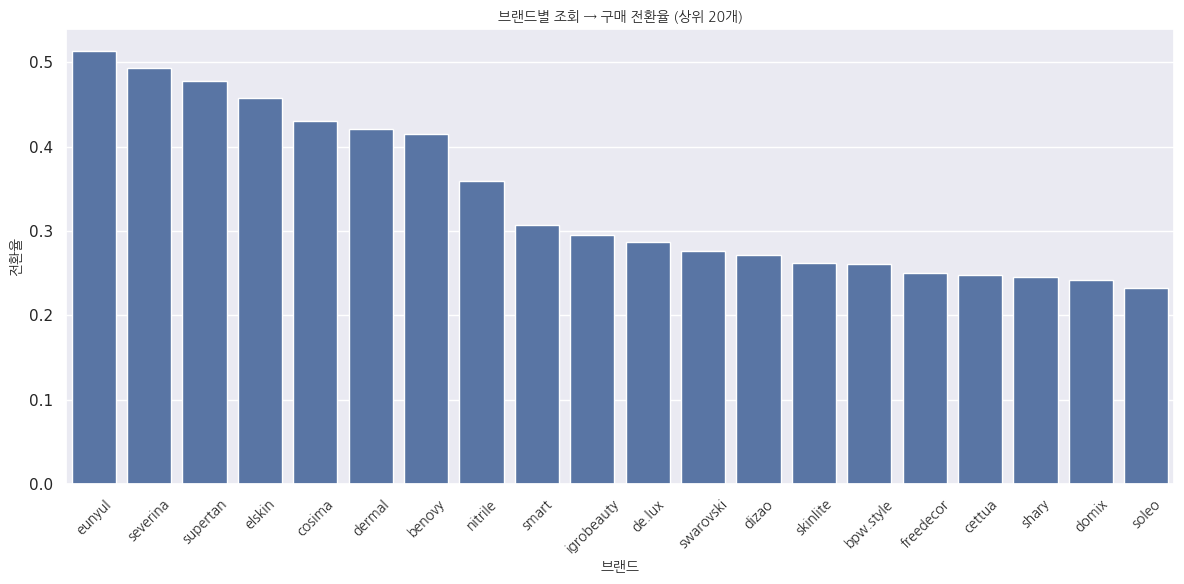

In [ ]:
# 브랜드별 이벤트 수 집계 (user_id 고유 수)
brand_event = df.groupby(['brand', 'event_type'])['user_id'].nunique().unstack(fill_value=0)

# view → purchase 전환율 계산
brand_event['view_to_purchase_rate'] = brand_event['purchase'] / brand_event['view']
brand_event.replace([float('inf'), float('nan')], 0, inplace=True)

# 전환율 기준 내림차순 정렬 후 상위 20개
brand_event_sorted = brand_event.sort_values(by='view_to_purchase_rate', ascending=False).head(20).reset_index()

# 상위 20개 출력
print(brand_event_sorted[['brand', 'view', 'purchase', 'view_to_purchase_rate']].head(20))

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='view_to_purchase_rate', data=brand_event_sorted)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.title('브랜드별 조회 → 구매 전환율 (상위 20개)', fontproperties=font_prop)
plt.xlabel('브랜드', fontproperties=font_prop)
plt.ylabel('전환율', fontproperties=font_prop)
plt.tight_layout()
plt.show()

---

View → Purchase 전환율이 매우 높은 브랜드
- eunyul, severina, supertan, elskin 등의 전환율이 0.4~0.5 이상으로 매우 높음.
- 이들은 브랜드 인지도가 높거나, 뷰어들이 실질적으로 구매까지 이어지는 경우가 많다는 의미로 해석할 수 있음.

---

적극적인 구매 전환 유도 성공
- eunyul, severina, supertan, elskin은 절반 이상의 조회가 실제 구매로 이어짐 → 매우 효율적인 고객 퍼널 구조를 가진 브랜드.
- 이들은 광고 ROI가 높고, 리타겟팅 없이도 구매 전환이 잘 일어나는 브랜드일 가능성이 높음.

---

전환율 상위 브랜드의 공통점 가설
- 이들은 대부분 저가형 위생용품, 마스크팩, 네일/뷰티 악세서리 제품으로 추정됨.
- 소비 결정이 빠른 품목, 재구매가 쉬운 품목, 설명이 단순한 품목이 많다는 특성 → 전환율에 긍정적 영향.

---

In [ ]:
top20_brands = brand_event_sorted['brand'].tolist()
df[df['brand'].isin(top20_brands)][['brand', 'category_id']].drop_duplicates()

,brand,category_id
25,bpw.style,1487580007675986893
29,de.lux,1487580007634043851
96,bpw.style,2055161088059638328
123,dizao,1487580011627020412
283,de.lux,1783999064136745198
...,...,...
19522245,cettua,1487580011627020412
19528974,cettua,1791442849384891169
19529547,cettua,1487580011903844485
19529622,cettua,1783999072365969578


특정 브랜드에서 View→Cart는 높은데 Cart→Purchase가 낮음
→ 장바구니 방치 → 리마케팅 타겟 후보

In [ ]:
# 1. 이벤트별 브랜드-이벤트 수 집계
brand_event_counts = df.pivot_table(
    index='brand',
    columns='event_type',
    values='user_id',
    aggfunc='count',
    fill_value=0
)

# 2. 전환율 계산
brand_event_counts['view_to_cart_rate'] = brand_event_counts['cart'] / brand_event_counts['view']
brand_event_counts['cart_to_purchase_rate'] = brand_event_counts['purchase'] / brand_event_counts['cart']

# 3. 무한대, NaN 처리
brand_event_counts.replace([np.inf, -np.inf], np.nan, inplace=True)
brand_event_counts.fillna(0, inplace=True)

# 4. 평균 전환율 계산
avg_view_to_cart = brand_event_counts['view_to_cart_rate'].mean()
avg_cart_to_purchase = brand_event_counts['cart_to_purchase_rate'].mean()

print(f"브랜드별 평균 View→Cart 전환율: {avg_view_to_cart:.4f}")
print(f"브랜드별 평균 Cart→Purchase 전환율: {avg_cart_to_purchase:.4f}")

브랜드별 평균 View→Cart 전환율: 0.4465
브랜드별 평균 Cart→Purchase 전환율: 0.1760


In [ ]:
# 1. 이벤트별 브랜드-이벤트 수 집계
brand_event_counts = df.pivot_table(
    index='brand',
    columns='event_type',
    values='user_id',
    aggfunc='count',
    fill_value=0
)

# 2. 전환율 계산
brand_event_counts['view_to_cart_rate'] = brand_event_counts['cart'] / brand_event_counts['view']
brand_event_counts['cart_to_purchase_rate'] = brand_event_counts['purchase'] / brand_event_counts['cart']

# 3. 무한대, NaN 처리
brand_event_counts.replace([np.inf, -np.inf], np.nan, inplace=True)
brand_event_counts.fillna(0, inplace=True)

# 4. 기준 설정
threshold_view_to_cart = brand_event_counts['view_to_cart_rate'].quantile(0.7)  # 상위 30%
threshold_cart_to_purchase = brand_event_counts['cart_to_purchase_rate'].quantile(0.3)  # 하위 30%

# 5. 조건에 맞는 브랜드 선별 + 원하는 컬럼만 추출
target_brands_df = brand_event_counts[
    (brand_event_counts['view_to_cart_rate'] >= threshold_view_to_cart) &
    (brand_event_counts['cart_to_purchase_rate'] <= threshold_cart_to_purchase)
][['view', 'cart', 'purchase', 'view_to_cart_rate', 'cart_to_purchase_rate']]

# 6. 결과 출력
print("View→Cart는 높고 Cart→Purchase는 낮은 브랜드:\n")
print(target_brands_df)

View→Cart는 높고 Cart→Purchase는 낮은 브랜드:

event_type  view  cart  purchase  view_to_cart_rate  cart_to_purchase_rate
brand                                                                     
balbcare    3406  2500       346           0.733999               0.138400
fly          109    68         6           0.623853               0.088235
i-laq       4372  3077       343           0.703797               0.111472
koelcia      304   155        21           0.509868               0.135484
litaline     942   486        33           0.515924               0.067901
luxvisage   1830  1027       159           0.561202               0.154820
philips       95    58         6           0.610526               0.103448
pilaten       25    29         3           1.160000               0.103448
rorec         38    23         1           0.605263               0.043478
tazol        268   143        14           0.533582               0.097902


---

고관심/저구매 브랜드군
- 제품 정보가 부족
- 리뷰/신뢰도에 비해 가격이 높음
- 배송 이슈, 재고 문제 등으로 최종 결제까지 이르지 못함
- 선물용으로만 카트에 넣고 실제 구매하지 않는 패턴일 수 있음

---

시장 내 대체재 많을 가능성
- 예 : i-laq (네일 브랜드)는 같은 색상/종류의 다른 브랜드 제품과 쉽게 대체 가능

---

pilaten처럼 cart 수가 view보다 많은 경우
- 사용자 재방문 중복 클릭
- 시스템적 오류 (이벤트 순서 오류, 봇 클릭 등)

---

### 브랜드 이벤트 발생량 (view / cart / purchase)

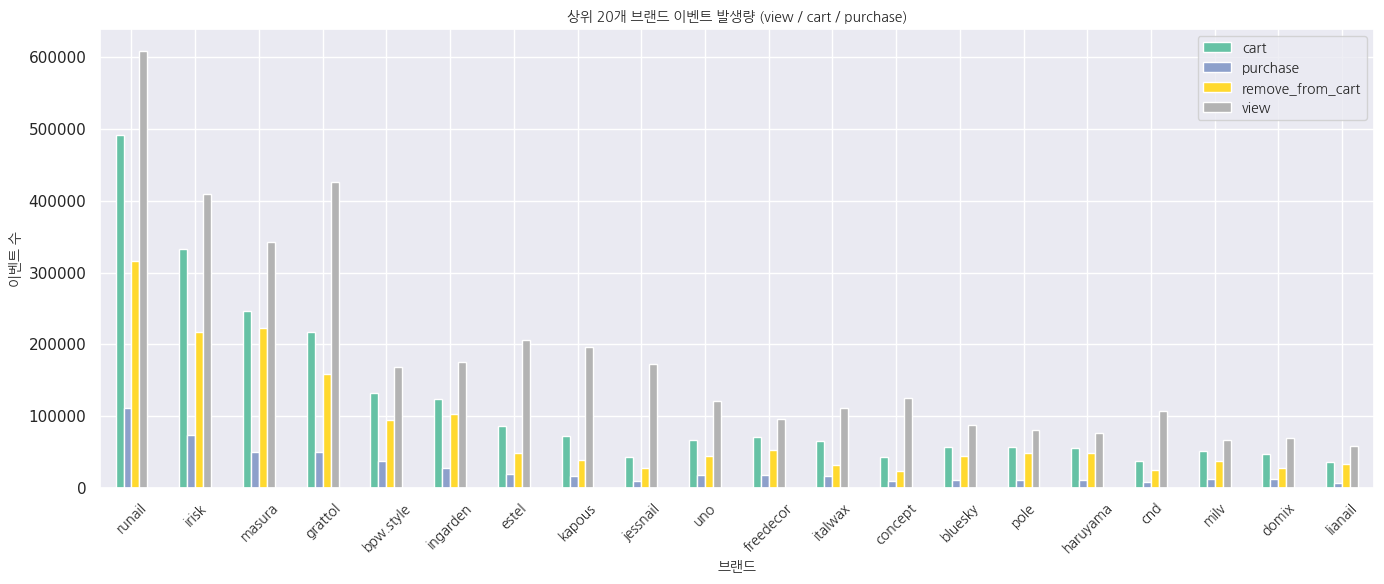

In [ ]:
# 브랜드별 이벤트 수 집계
brand_event_counts = df.groupby(['brand', 'event_type']).size().unstack(fill_value=0)

# 상위 20개 브랜드만 가져오기 (view + cart + purchase 총합 기준)
top20_brands = brand_event_counts.sum(axis=1).nlargest(20).index
brand_event_top20 = brand_event_counts.loc[top20_brands]

# 시각화
brand_event_top20.plot(kind='bar', figsize=(14, 6), colormap='Set2')

plt.title('상위 20개 브랜드 이벤트 발생량 (view / cart / purchase)', fontproperties=font_prop)
plt.xlabel('브랜드', fontproperties=font_prop)
plt.ylabel('이벤트 수', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.tight_layout()
plt.show()

In [ ]:
brand_product = df.groupby('brand')['product_id'].unique().reset_index()

# 보기 편하게 리스트 대신 문자열로 합치기 (필요 시)
brand_product['product_list'] = brand_product['product_id'].apply(lambda x: ', '.join(map(str, x)))

print(brand_product[['brand', 'product_list']].head(20))  # 상위 20개 브랜드 출력

            brand                                       product_list
0        airnails  5659825, 5662280, 5659639, 5659772, 5746051, 5...
1           almea  5859284, 5859270, 5859299, 5859277, 5859278, 5...
2          andrea                                   5525802, 5525787
3          ardell  5617817, 26766, 26758, 5606698, 5808657, 37004...
4        arganoil  5918376, 5918372, 5918380, 5918381, 5918379, 5...
5      art-visage  5812119, 5891380, 5812127, 5812122, 5812120, 5...
6           artex  5857677, 5857674, 5857669, 5857683, 5857671, 5...
7            aura  5894291, 5894298, 5894297, 5894294, 5894289, 5...
8       australis  5811213, 5811199, 5811161, 5811204, 5811191, 5...
9           avene  5906914, 5911183, 5911182, 5915598, 5906541, 5...
10       babyliss  5915004, 5914991, 5914983, 5915003, 5915012, 5...
11       balbcare                                       36406, 36407
12         barbie                          5852057, 5865501, 5756269
13          barex  5910546, 591054